# Figure 1: showcase problem and solution using ERA5

(c) 2023 under a MIT License (https://mit-license.org)

Author: Lukas Brunner (l.brunner@univie.ac.at)

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

from core.core_functions import calc_bias
from core.io_functions import model_names, get_filename, PLOT_PATH
from core.mapplot import plot_map, plot_boxes, plot_hatching
from core.lineplot import lineplot, barplot_monthly
mpl.rc('font', **{'size': 6})
cm = 1/2.54  # centimeters in inches

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


In [2]:
fn = get_filename()
ds = xr.open_dataset(fn)
ds

<xarray.Dataset>
Dimensions:                     (time: 10950, lon: 144, lat: 72, dayofyear: 365)
Coordinates:
  * time                        (time) object 1961-01-01 11:00:00 ... 1990-12...
  * lon                         (lon) float64 1.25 3.75 6.25 ... 356.2 358.8
  * lat                         (lat) float64 -88.75 -86.25 ... 86.25 88.75
Dimensions without coordinates: dayofyear
Data variables:
    tasmax                      (time, lat, lon) float32 ...
    tasmax_deseasonalized       (lat, lon, time) float32 ...
    seasonal_cycle              (lat, lon, dayofyear) float32 ...
    threshold                   (lat, lon, dayofyear) float32 ...
    threshold_deseasonalized    (lat, lon, dayofyear) float32 ...
    exceedances                 (lat, lon, time) float32 ...
    exceedances_deseasonalized  (lat, lon, time) float32 ...
Attributes:
    window:         31
    percentile:     90
    source_file:    /mnt/scratch/shared/ERA5_tmp/ERA5/tasmax/day/g025/era5_ta...
    paper_title:    Pitfalls in diagnosing temperature extremes
    paper_authors:  Lukas Brunner and Aiko Voigt
    paper_journal:  Nature Communcations
    data_license:   CC BY
    contact:        Lukas Brunner (l.brunner@univie.ac.at)
    url_code:       https://github.com/lukasbrunner/running_window_bias

## Figure 1a: global bias map

Mean (0/5/95/100 perc): -10.4% (-57.1%/-24.7%/-1.2%/1.4%)
lat=33.75, lon=311.25
lat=51.25, lon=11.25
lat=18.75, lon=76.25
lat=-61.25, lon=338.75
lat=41.25, lon=251.25
lat=81.25, lon=246.25


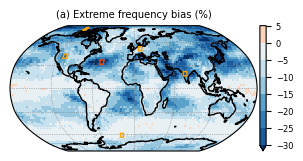

In [3]:
bias = calc_bias(ds['exceedances'], 90)
fig, ax = plot_map(bias)
plot_boxes(
    ax, ds, 
    [(34, 311),  # North Atlantic -> shown in main paper
     # supplement
     (50, 10),   # Europe
     (18, 77),   # India
     # (-2, 164),  # Equator
     (-61,339),  # Southern Ocean
     (40, 250),  # US
     (81, 246),  # Arctic Ocean
    ],  
    colors=['orangered'] + ['orange'] *10,
)
ax.set_title('(a) Extreme frequency bias (%)')
fig.tight_layout()
fig.savefig(os.path.join(PLOT_PATH, 'figure1a.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure1a.pdf'), dpi=300)

## Figure 1b: global bias map corrected

Mean (0/5/95/100 perc): -0.5% (-9.8%/-2.5%/0.7%/2.0%)


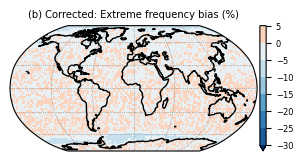

In [4]:
bias = calc_bias(ds['exceedances_deseasonalized'], 90)
fig, ax = plot_map(bias)
# plot_boxes(
#     ax, ds, 
#     [(34, 311),  # North Atlantic
#      (50, 10),   # Europe
#      (18, 77),   # India
#      (-2, 164),  # Equator
#      (-61,339),  # Southern Ocean
#      (40, 250),  # US
#     ],  
#     colors=['orangered'] + ['orange'] *10,
# )
ax.set_title('(b) Corrected: Extreme frequency bias (%)')
fig.tight_layout()
fig.savefig(os.path.join(PLOT_PATH, 'figure1b.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure1b.pdf'), dpi=300)

## Figure 1c: time series of grid cell in the North Atlantic

Annual mean bias: -32.8%


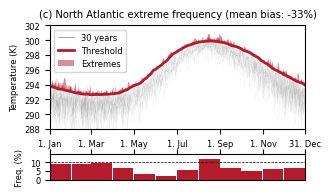

In [14]:
fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    ds['tasmax'].sel(lat=33.75, lon=311.25).values,
    threshold=ds['threshold'].sel(lat=33.75, lon=311.25).values,
    ylim=(288, 302),
)
ax1.set_yticks(range(288, 303, 2))

ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    ds['exceedances'].sel(lat=33.75, lon=311.25), 
    percentile=90,
    show_bias=False,
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(c) North Atlantic extreme frequency (mean bias: -33%)')
# fig.savefig(os.path.join(PLOT_PATH, 'figure1c.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure1c.pdf'), dpi=300)

## Figure 1d: time series of grid cell in the North Atlantic corrected

Annual mean bias: -0.3%


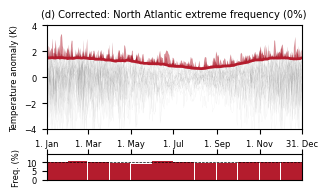

In [13]:
fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    ds['tasmax_deseasonalized'].sel(lat=33.75, lon=311.25).values,
    threshold=ds['threshold_deseasonalized'].sel(lat=33.75, lon=311.25).values,
    ylim=(-4, 4),
    show_legend=False,
)

ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    ds['exceedances_deseasonalized'].sel(lat=33.75, lon=311.25), 
    percentile=90,
    show_bias=False,
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(d) Corrected: North Atlantic extreme frequency (0%)')
# fig.savefig(os.path.join(PLOT_PATH, 'figure1d.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure1d.pdf'), dpi=300)